# Lesson 02: アヤメのデータセットを使いScikit-learnで機械学習

- scikit-learn本家：http://scikit-learn.org/stable/
- scikit-learn本家チュートリアル：http://scikit-learn.org/stable/tutorial/

In [1]:
from IPython.display import IFrame
IFrame('http://scikit-learn.org/stable', width=800, height=400)

In [2]:
import warnings

## ステップ１：データハンドリング

#### 標準的なデータセット

- 分類用データセット
    - [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) - フィッシャーのアヤメ
    - [digits dataset](http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits) - 手書き文字
- 回帰用データセット
    - [boston dataset](http://archive.ics.uci.edu/ml/datasets/Housing) - ボストンの家の価格

#### 標準的なデータセットの読み込み

- 参考資料１：[Loading an example dataset](http://scikit-learn.org/stable/tutorial/basic/tutorial.html#loading-an-example-dataset)
- 参考資料２：[Dataset loading utilities](http://scikit-learn.org/stable/datasets/index.html#datasets) - Dataset APIに関する詳しい説明

In [3]:
# scikit-learnを読み込む
import sklearn

In [4]:
# scikit-learnからデータセットを読み込む
from sklearn import datasets

In [5]:
# アヤメのデータセットを読み込む
iris = datasets.load_iris()

In [6]:
iris.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

### データとメタデータ

- データ
    - 入力データ　`.data`
    - 出力データ　`.target`
- メタデータ
    - 入力の特徴量　`.feature_names`
    - 出力の特徴量　`.target_names`
    - データセットの詳細　`.DESCR`

In [7]:
iris.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [8]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

- petalは「花びら」
- sepalは「花弁」

In [10]:
IFrame('http://sebastianraschka.com/images/blog/2014/linear-discriminant-analysis/iris_petal_sepal.png',
       width=400, height=450)

In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

In [12]:
IFrame('http://image.slidesharecdn.com/irisdataanalysiswithr-140801203600-phpapp02/95/iris-data-analysis-example-in-r-3-638.jpg?cb=1406925587',
       width=600, height=400)

In [13]:
# 入力データをX、出力データ（ターゲット）をyとする
X = iris.data
y = iris.target

In [14]:
# 形をみる
print X.shape
print y.shape

(150, 4)
(150,)


In [15]:
# データ型をみる
type(X)

numpy.ndarray

## ステップ２：初期分析と仮説構築

In [16]:
# 可視化用ライブラリの読み込み
%matplotlib inline
import matplotlib.pyplot as plt

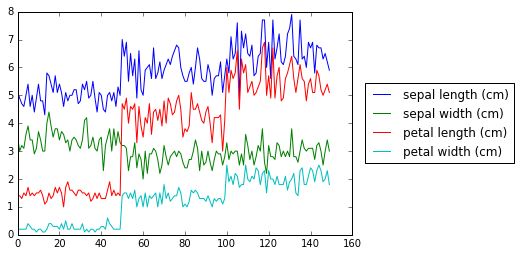

In [17]:
# Xをplt.plot()で描画する
plt.plot(X)
plt.legend(iris.feature_names, 
           loc='center left',
          bbox_to_anchor=(1.02, 0.5))

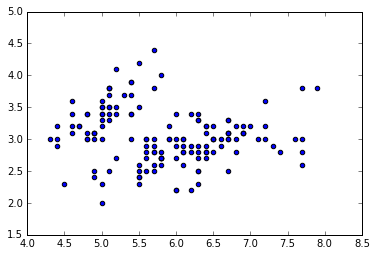

In [18]:
# Xをplt.scatter()で描画する
plt.scatter(X[:, 0], X[:, 1])

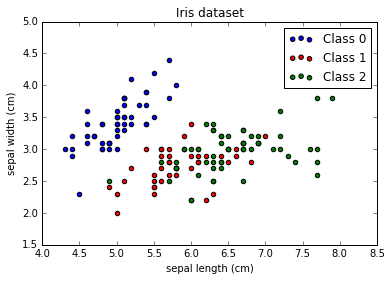

In [19]:
fig, ax = plt.subplots()
ax.scatter(X[y==0, 0], X[y==0, 1], label='Class 0')
ax.scatter(X[y==1, 0], X[y==1, 1], c='r', label='Class 1')
ax.scatter(X[y==2, 0], X[y==2, 1], c='g', label='Class 2')
ax.legend()
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1], title="Iris dataset");

### データをもっとよく見てみたい！

- [pandas](http://pandas.pydata.org/)
- [seaborn](https://web.stanford.edu/~mwaskom/software/seaborn/)

In [20]:
# pandasの読み込み
import pandas as pd

In [21]:
# seabornの読み込み
import seaborn as sns

In [22]:
# データをpandas.DataFrameに格納
df_X = pd.DataFrame(X, columns=iris.feature_names) 
df_y = pd.DataFrame(y, columns=['species'])

In [23]:
df_X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


#### speciesの数値を文字列で置き換える

In [24]:
names = iris.target_names
names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

In [25]:
# 変換用の辞書を作る
rdict = dict(zip(range(len(names)), names))
rdict

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [26]:
# speciesの数字を、文字列で置き換え
#df_y = df_y.replace({0: names[0], 1: names[1], 2: names[2]})
df_y = df_y.replace(rdict)

In [27]:
# 入力と出力をまとめたデータフレームを作成
df = pd.concat([df_X, df_y], axis=1)

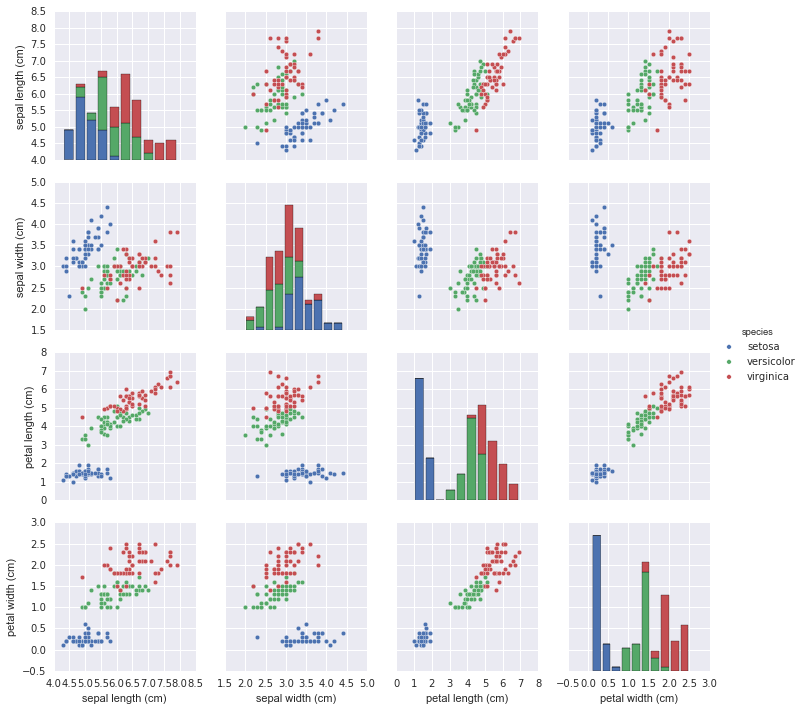

In [28]:
# pairplotでデータを可視化
sns.pairplot(df, hue='species')

### QUIZ: pairplotの引数を変えてみよう。

- [Seaborn HP](https://stanford.edu/~mwaskom/software/seaborn/index.html)
- [Seaborn Gallery](https://stanford.edu/~mwaskom/software/seaborn/examples/index.html)
- [Seaborn API Reference](https://stanford.edu/~mwaskom/software/seaborn/api.html)

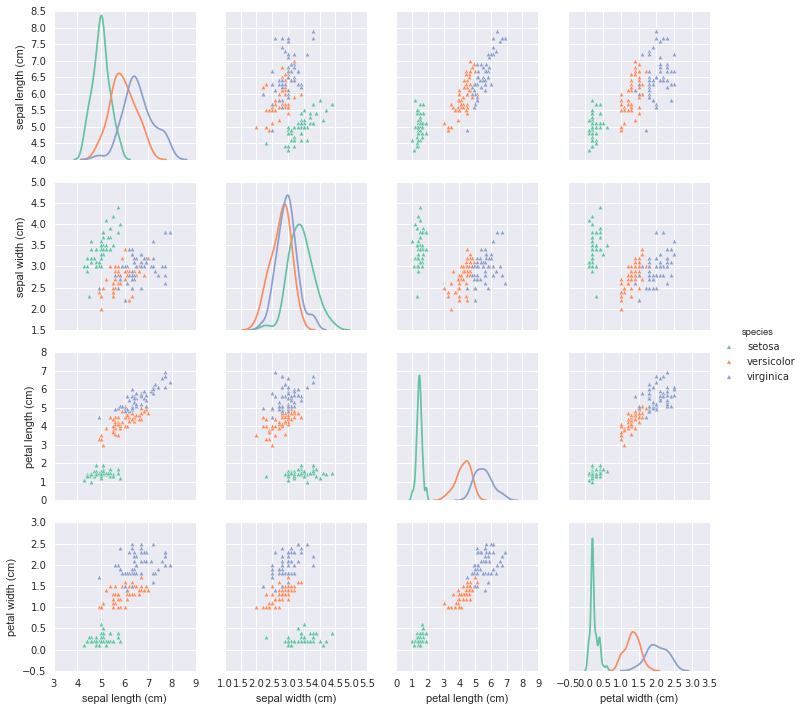

In [29]:
sns.pairplot(df, hue='species', 
             diag_kind='kde', 
             markers='^',
             palette='Set2')

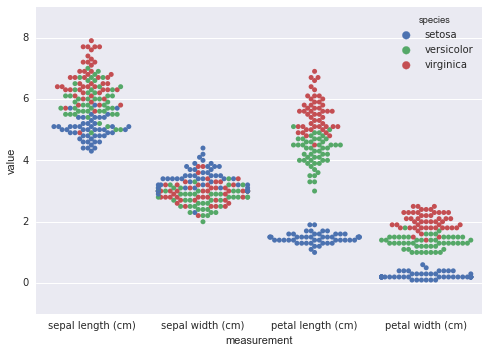

In [30]:
# "Melt" the dataset to "long-form" or "tidy" representation
df_iris = pd.melt(df, "species", var_name="measurement")

# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="measurement", y="value", hue="species", data=df_iris)

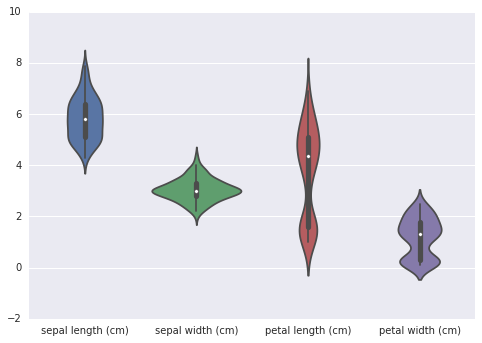

In [31]:
sns.violinplot(data=df)

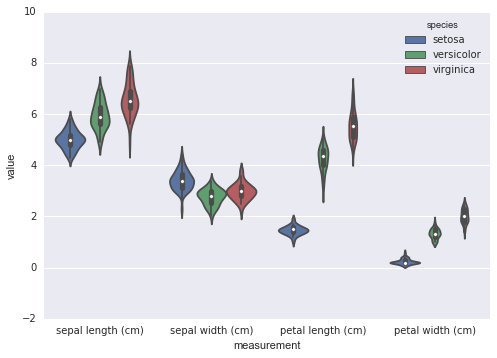

In [32]:
sns.violinplot(x="measurement", y="value", hue='species', data=df_iris)

In [33]:
df.columns

Index([u'sepal length (cm)', u'sepal width (cm)', u'petal length (cm)',
       u'petal width (cm)', u'species'],
      dtype='object')

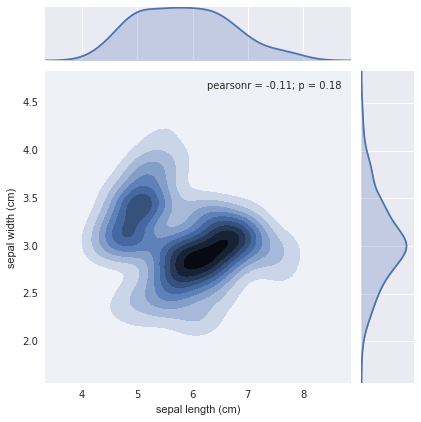

In [34]:
sns.jointplot(data=df, x=df.columns[0], y=df.columns[1], kind='kde')

In [35]:
# データの散らばり具合（標準偏差）を見てみる
X.std(axis=0)

array([ 0.82530129,  0.43214658,  1.75852918,  0.76061262])

実は、すべてのデータを使ってスケーリングするのは、あまりよくない。

In [36]:
# データをトレーニングセットとテストセットに分割するためにcross_validationモジュールを読み込む
from sklearn import cross_validation

In [37]:
# 全データをトレーニングセット（X, y）とテストセット（X_test, y_test）に分割
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, 
                                                                     test_size=.2, random_state=42)

In [38]:
# トレーニングセットの形をみる
print X_train.shape
print y_train.shape

(120, 4)
(120,)


In [39]:
# テストセットの形をみる
print X_test.shape
print y_test.shape

(30, 4)
(30,)


#### データの正規化は、本来であればこうやる

In [40]:
# preprocessingモジュールの読み込み
from sklearn import preprocessing

In [41]:
# StandardScalerオブジェクト（scaler）を作る
scaler = preprocessing.StandardScaler()

In [42]:
# scalerをトレーニングセットにフィッティング
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [43]:
# 学習済のscalerを使い、トレーニングセットとテストセットの両方を変換する
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
# 変換した結果の標準偏差を表示
print X_train.std(axis=0)
print X_test.std(axis=0)

[ 1.  1.  1.  1.]
[ 1.01274741  0.85087216  1.03808382  1.06262107]


## ステップ３：機械学習

- 問題設定にあったモデルを選ぶ

- http://scikit-learn.org/stable/index.html
- http://scikit-learn.org/stable/modules/classes.html

In [45]:
# まずは簡単なモデルで試してみよう

# 線形モデル
from sklearn import linear_model
model = linear_model.LogisticRegression()

# サポートベクターマシン
#from sklearn import svm
#model = svm.SVC()

# ランダムフォレスト
#from sklearn import ensemble
#model = ensemble.RandomForestClassifier(n_estimators=5, max_depth=10)

# 勾配ブースティング
#from sklearn import ensemble
#model = ensemble.GradientBoostingClassifier()

In [46]:
# 学習
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
# 予測精度の計算（方法１）
acc0 = model.score(X_test, y_test) * 100
print "Accuracy is {0:.2f}%".format(acc0)

Accuracy is 96.67%


In [48]:
# 予測精度の計算（方法２）
y_test_pred = model.predict(X_test)
acc1 = (y_test == y_test_pred).mean() * 100
print "Accuracy is {0:.2f}%".format(acc1)

Accuracy is 96.67%


## ステップ４：結果の評価

In [49]:
# 予測モデルの読み込み

# 分類モデル
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier 
from sklearn.naive_bayes import GaussianNB
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# 交差検証
from sklearn.cross_validation import KFold, cross_val_score

In [50]:
classifiers = [
    ('lr', LogisticRegression()), 
    ('knn', KNeighborsClassifier()),
    ('linear svc', SVC(kernel="linear")),
    ('rbf svc', SVC(gamma=2)),
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier(random_state=42)),
    ('ab', AdaBoostClassifier()),
    ('gbc', GradientBoostingClassifier()),
    ('gnb', GaussianNB()),
#    ('lda', LinearDiscriminantAnalysis()),
#    ('qda', QuadraticDiscriminantAnalysis())
]

In [51]:
import time
results = {}
exec_times = {}

for name, model in classifiers:
    tic = time.time()
    result = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    exec_time = time.time() - tic
    exec_times[name] = exec_time
    results[name] = result
    
    print("{0:.3f} ({1:.3f}): time {2:.2f}s, {3}".format(result.mean(), result.std(), exec_time, name))

0.876 (0.073): time 0.01s, lr
0.925 (0.055): time 0.01s, knn
0.950 (0.061): time 0.01s, linear svc
0.941 (0.063): time 0.01s, rbf svc
0.933 (0.050): time 0.01s, dt
0.942 (0.033): time 0.09s, rf
0.942 (0.050): time 0.41s, ab
0.933 (0.050): time 0.46s, gbc
0.941 (0.063): time 0.00s, gnb


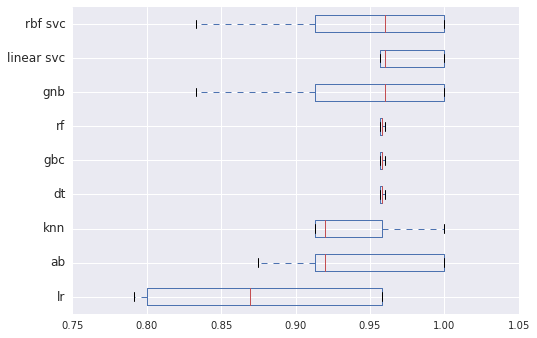

In [52]:
warnings.simplefilter("ignore")

# 結果の描画を楽にするためpandasのデータフレームに結果を入れる
import pandas as pd

df = pd.DataFrame(results)

df[df.median().sort_values(ascending=True).index].boxplot(vert=False);

In [53]:
# 結果とモデルパラメータの詳細表示
for name, model in classifiers:
    result = results[name]
    print("{0:.3f} ({1:.3f})\n{2}\n{3}\n----------".format(result.mean(), result.std(), result, model.__str__()))

0.876 (0.073)
[ 0.8         0.95833333  0.79166667  0.95833333  0.86956522]
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
----------
0.925 (0.055)
[ 0.92        0.95833333  0.83333333  1.          0.91304348]
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
----------
0.950 (0.061)
[ 0.96        1.          0.83333333  1.          0.95652174]
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
----------
0.941 (0.063)
[ 0.96        1.          0.83333333  1.          0.91304348]
SVC(C=1

In [54]:
# 計算時間でソート
sorted(exec_times.items(), key=lambda x: -x[1])

[('gbc', 0.46097803115844727),
 ('ab', 0.4080932140350342),
 ('rf', 0.09401702880859375),
 ('lr', 0.012260913848876953),
 ('linear svc', 0.010487079620361328),
 ('knn', 0.010447025299072266),
 ('rbf svc', 0.009979009628295898),
 ('dt', 0.00697016716003418),
 ('gnb', 0.00409388542175293)]

### ハイパーパラメーターサーチ

#### １次元の場合

In [55]:
# validation_curveを呼び込む
from sklearn.learning_curve import validation_curve

In [56]:
# SVC(kernel='rbf', C=1)における適切なgammaパラメータを探す
import numpy as np
#param_range = np.arange(1, 20)
param_range = np.logspace(-4, 4, 9)
train_scores, valid_scores = validation_curve(SVC(kernel='rbf', C=1), X_train, y_train, param_name="gamma", 
                                              param_range=param_range)

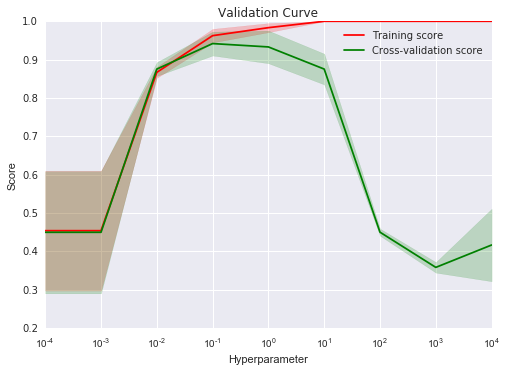

Best parameter is 0.1


In [57]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.title("Validation Curve")
plt.xlabel("Hyperparameter")
plt.ylabel("Score")
#plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(param_range, valid_scores_mean, label="Cross-validation score",
             color="g")
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.show()

print "Best parameter is {}".format(param_range[valid_scores_mean.argmax()])

#### ２次元の場合

参考資料：[RBF SVM parameters (scikit-learn)](http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html)

In [58]:
# GridSearchCVモジュールの読み込み
from sklearn.grid_search import GridSearchCV

In [59]:
# モデルの構築
model = RandomForestClassifier()

In [60]:
# 各ハイパーパラメータごとに調べるポイントを決める
n_estimators_range = [5, 10, 20, 40, 80]
max_depth_range = [1, 2, 3, 4, 5]

#C_range = np.logspace(-2, 10, 13)
#gamma_range = np.logspace(-9, 3, 13)
#C_range = np.logspace(-2, 3, 6)
#gamma_range = np.logspace(-3, 2, 6)

In [61]:
# 探索範囲をparam_gridにまとめる
param_grid = dict(n_estimators=n_estimators_range, max_depth=max_depth_range)

In [62]:
# GridSearchCVを使い、グリッドサーチオブジェクトを構築
gs = GridSearchCV(model, param_grid=param_grid, cv=10, n_jobs=-1)

In [63]:
# グリッドサーチを実行
gs.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [5, 10, 20, 40, 80], 'max_depth': [1, 2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [64]:
# 最良のハイパーパラメータを表示
print("The best parameters are %s with a score of %0.2f"
      % (gs.best_params_, gs.best_score_))

The best parameters are {'n_estimators': 5, 'max_depth': 4} with a score of 0.96


In [65]:
# ハイパーパラメータの組み合わせに対する評価値をすべて列挙
gs.grid_scores_

[mean: 0.73333, std: 0.10140, params: {'n_estimators': 5, 'max_depth': 1},
 mean: 0.80000, std: 0.13162, params: {'n_estimators': 10, 'max_depth': 1},
 mean: 0.87500, std: 0.13277, params: {'n_estimators': 20, 'max_depth': 1},
 mean: 0.85000, std: 0.12487, params: {'n_estimators': 40, 'max_depth': 1},
 mean: 0.90000, std: 0.12250, params: {'n_estimators': 80, 'max_depth': 1},
 mean: 0.92500, std: 0.10181, params: {'n_estimators': 5, 'max_depth': 2},
 mean: 0.95000, std: 0.07674, params: {'n_estimators': 10, 'max_depth': 2},
 mean: 0.93333, std: 0.10415, params: {'n_estimators': 20, 'max_depth': 2},
 mean: 0.93333, std: 0.09725, params: {'n_estimators': 40, 'max_depth': 2},
 mean: 0.93333, std: 0.09725, params: {'n_estimators': 80, 'max_depth': 2},
 mean: 0.95000, std: 0.06708, params: {'n_estimators': 5, 'max_depth': 3},
 mean: 0.95000, std: 0.07649, params: {'n_estimators': 10, 'max_depth': 3},
 mean: 0.93333, std: 0.09725, params: {'n_estimators': 20, 'max_depth': 3},
 mean: 0.95000,

In [66]:
cv_scores = []
for gsgs in gs.grid_scores_:
    tmp = gsgs.parameters.values() + gsgs.cv_validation_scores.tolist()
    cv_scores.append(tmp)
    
param_names = gsgs.parameters.keys()
columns = param_names + np.arange(len(gsgs.cv_validation_scores)).tolist()

df_gs = pd.DataFrame(cv_scores, columns=columns)
df_gs.set_index(param_names, inplace=True)

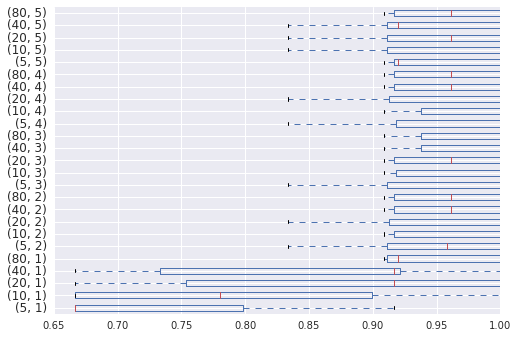

In [67]:
warnings.simplefilter("ignore")

# boxplotで見てみる
df_gs.T.boxplot(vert=False);

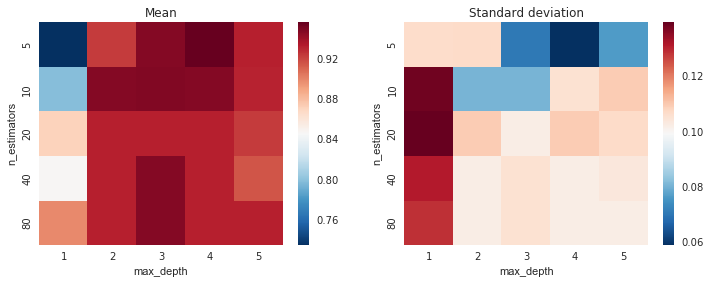

In [68]:
import seaborn as sns
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(df_gs.mean(axis=1).unstack(), ax=ax[0], cmap='RdBu_r')
ax[0].set_title('Mean')
sns.heatmap(df_gs.std(axis=1).unstack(), ax=ax[1], cmap="RdBu_r")
ax[1].set_title('Standard deviation')

In [69]:
# モデルの構築（グリッドサーチで見つけたベストなパラメータを使用）
print gs.best_params_
best_model = RandomForestClassifier(**gs.best_params_)
#best_model = RandomForestClassifier(n_estimators=10, max_depth=2)

{'n_estimators': 5, 'max_depth': 4}


In [70]:
# モデルの学習
best_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [71]:
# トレーニングデータに対する予測精度
print "mean accuracy (train): {0:.3f}".format(best_model.score(X_train, y_train))

# テストデータに対する予測精度
print "mean accuracy (test): {0:.3f}".format(best_model.score(X_test, y_test))

mean accuracy (train): 0.967
mean accuracy (test): 1.000


In [72]:
# ベストなパラメータを別名で保存
rf_best_params = gs.best_params_

#### 3次元以上の場合

- 方法１：GridSearchCVを使う
    - パラメータ空間の次元がそれほど高くないときは使えるが、すぐに次元の呪いでキツくなる...
- 方法２: RandomizedSearchCVを使う
    - 高次元になった場合はランダムサーチの方が効率的

In [73]:
# ランダムサーチ用にRandomizedSearchCVモジュールを読み込む
from sklearn.grid_search import RandomizedSearchCV

In [74]:
# 分布を指定するためにscipy.statsを読み込む
import scipy.stats as stats
#from scipy.stats import randint as sp_randint

In [75]:
# パラメータ空間上に分布を指定する（今回はランダムフォレストを仮定）
param_dist = {
    "n_estimators": stats.randint(2, 500),
    "max_depth": [2, 3, 4, None],
    "max_features": stats.randint(1, 5),
    "min_samples_split": stats.randint(1, 11),
    "min_samples_leaf": stats.randint(1, 11),
    "learning_rate": stats.uniform(0.01, 0.99)}

In [76]:
# ランダムサーチCVオブジェクトを作る
random_search = RandomizedSearchCV(GradientBoostingClassifier(random_state=42), 
                                   param_distributions=param_dist,
                                   n_iter=20, random_state=42, n_jobs=-1)

In [77]:
# ランダムサーチを実行
tic = time.time() # 時間計測開始
random_search.fit(X_train, y_train)
toc = time.time() # 時間計測終了

In [78]:
# 結果を表示
from pprint import pprint
print("Best score: {0}\nExecution time: {1:.2f} sec".format(random_search.best_score_, toc - tic))
print("Best param:")
pprint(random_search.best_params_)

Best score: 0.95
Execution time: 3.58 sec
Best param:
{'learning_rate': 0.04096931329502761,
 'max_depth': 4,
 'max_features': 2,
 'min_samples_leaf': 7,
 'min_samples_split': 4,
 'n_estimators': 169}


In [79]:
# ベストなパラメータを別名で保存
gb_best_params = random_search.best_params_

In [80]:
# モデルの構築（ランダムサーチで見つけたベストなパラメータを使用）
best_model = GradientBoostingClassifier(**gb_best_params)

In [81]:
# モデルの構築（ランダムサーチで見つけたベストなパラメータを使用）
best_model = GradientBoostingClassifier(**gb_best_params)

In [82]:
# モデルの学習
best_model.fit(X_train, y_train)

GradientBoostingClassifier(init=None, learning_rate=0.040969313295,
              loss='deviance', max_depth=4, max_features=2,
              max_leaf_nodes=None, min_samples_leaf=7, min_samples_split=4,
              min_weight_fraction_leaf=0.0, n_estimators=169,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [83]:
# トレーニングデータに対する予測精度
print "mean accuracy (train): {0:.3f}".format(best_model.score(X_train, y_train))

# テストデータに対する予測精度
print "mean accuracy (test): {0:.3f}".format(best_model.score(X_test, y_test))

mean accuracy (train): 1.000
mean accuracy (test): 1.000


## モデルアンサンブルによる予測

In [84]:
# VotingClassifierの読み込み
from sklearn.ensemble import VotingClassifier

In [85]:
# 複数のモデルを用意。各モデルのハイパーパラメータはチューニング済みと仮定
classifiers = [
    ('rbf svc', SVC(kernel='rbf', C=1.0, gamma=0.1)),
    ('rf', RandomForestClassifier(**rf_best_params)),
    ('gb', GradientBoostingClassifier(**gb_best_params))
]

In [86]:
# VotingClassifierの作成
models = VotingClassifier(classifiers, weights=[1, 1, 1])

In [87]:
# トレーニング
models.fit(X_train, y_train)

VotingClassifier(estimators=[('rbf svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)), ('rf', RandomForestClassifier(bootstrap=True, class_w...      presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False))],
         voting='hard', weights=[1, 1, 1])

In [88]:
# トレーニングデータに対する予測精度
print("mean accuracy (train): {0:.4f}".format(models.score(X_train, y_train)))

# テストデータに対する予測精度
print("mean accuracy (test): {0:.4f}".format(models.score(X_test, y_test)))

mean accuracy (train): 0.9833
mean accuracy (test): 1.0000
